In [1]:
import pandas as pd
import numpy as np
from network import Network

## Data preparation ##

In [2]:
from sklearn.datasets import fetch_openml

# Fetch the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
x, y = mnist["data"], mnist["target"]

In [3]:
x =  x / 255
y = y.astype("int64")

In [4]:
x.head(10)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data = pd.concat([x,y],axis=1)

In [6]:
data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [7]:
randomized_data = data.sample(frac=1,random_state=42)

split_index = int(0.8 * len(randomized_data))

train_data = randomized_data[:split_index]
test_data = randomized_data[split_index:]

train_x,train_y = train_data[["pixel"+str(i)for i in range(1,785)]],train_data["class"]
test_x,test_y = test_data[["pixel"+str(i)for i in range(1,785)]],test_data["class"]

In [8]:
#one hot encode the labels
train_y = pd.get_dummies(train_y)
train_y = train_y.astype("int")
train_x,train_y = train_x.to_numpy(),train_y.to_numpy()
test_y = pd.get_dummies(test_y)
test_y = test_y.astype("int")
test_x,test_y = test_x.to_numpy(),test_y.to_numpy()

## Experimenting ##

In [9]:
#create an instance of the network
nn = Network([784,16,16,10])

Epoch 0, Loss: 0.5375689397485184, Accuracy: 0.8398392857142857
Epoch 100, Loss: 0.09409991268987422, Accuracy: 0.9753214285714286
Epoch 200, Loss: 0.06775352071608914, Accuracy: 0.9835178571428571
Epoch 300, Loss: 0.05898953231013617, Accuracy: 0.9863214285714286
Epoch 400, Loss: 0.05311160117160036, Accuracy: 0.9879821428571428


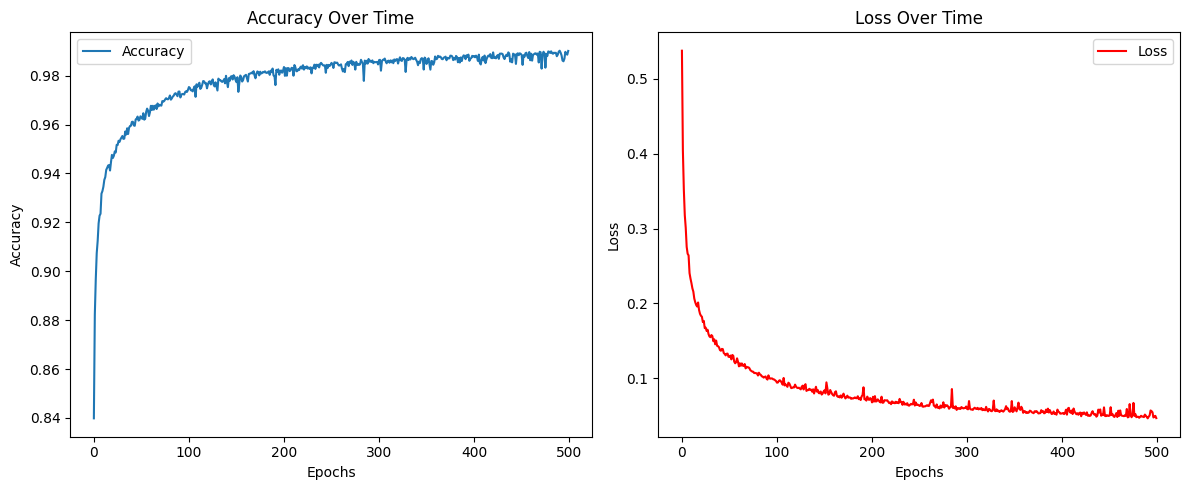

In [10]:
nn.train(train_x.T,train_y.T,learnRate=0.01,epochs=500,batch_size=100,show_training_progress=True,show_training_progress_rate=100)

In [11]:
print(nn.calculate_accuracy(train_y.T,nn.feed_forward(train_x.T))*100,"%")

99.00892857142857 %


In [12]:
print(nn.calculate_accuracy(test_y.T,nn.feed_forward(test_x.T))*100,"%")

93.06428571428572 %


In [14]:
nn.save_model("handwritten_digits_V1.0")

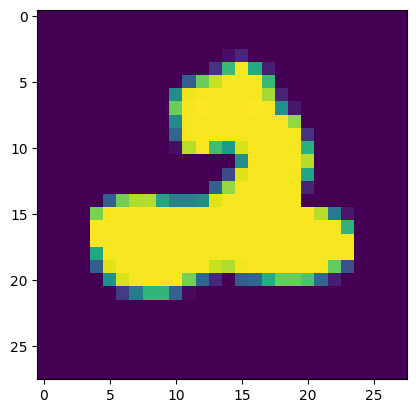

In [18]:
import matplotlib.pyplot as plt
random_image = test_x[1].reshape(28,28)
plt.imshow(random_image,cmap="gray")